In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")
df=df.dropna()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['FUEL'] = encoder.fit_transform(df['FUEL'])

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
dtype: int64

In [6]:
X

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0,10,96,0.0,75
1,1,0,10,96,0.0,72
2,1,0,10,96,2.6,70
3,1,0,10,96,3.2,68
4,1,0,10,109,4.5,67
...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5
17438,7,2,190,84,2.0,4
17439,7,2,190,80,1.5,3
17440,7,2,190,76,0.4,2


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0,10,96,0.0,75
1,1,0,10,96,0.0,72
2,1,0,10,96,2.6,70
3,1,0,10,96,3.2,68
4,1,0,10,109,4.5,67
...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5
17438,7,2,190,84,2.0,4
17439,7,2,190,80,1.5,3
17440,7,2,190,76,0.4,2


In [9]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [10]:
principal=[]
for i in range(2,5):
    pi=PCA(n_components=i)
    pi.fit(X)
    data=pi.transform(X)
    principal.append(np.sum((pi.explained_variance_ratio_*100)))

In [11]:
principal

[56.64574299107471, 75.24810943608102, 89.97907632440791]

Text(0, 0.5, 'VARIANCE')

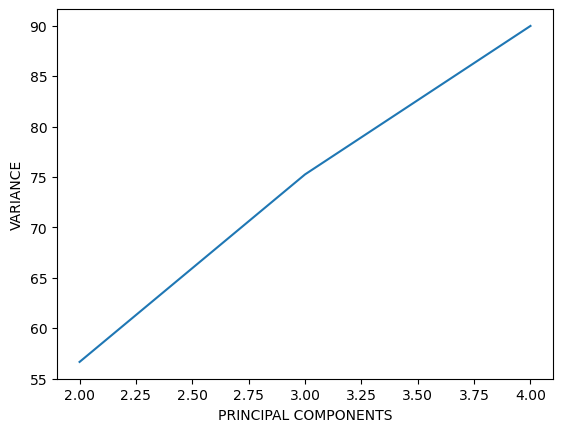

In [12]:
plt.plot(range(2,5,1),principal)
plt.xlabel("PRINCIPAL COMPONENTS")
plt.ylabel("VARIANCE")

In [13]:
pi=PCA(n_components=3)
pi.fit(X)
data=pi.transform(X)

C:\Users\Naboth Demetrius\anaconda3\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'pc2')

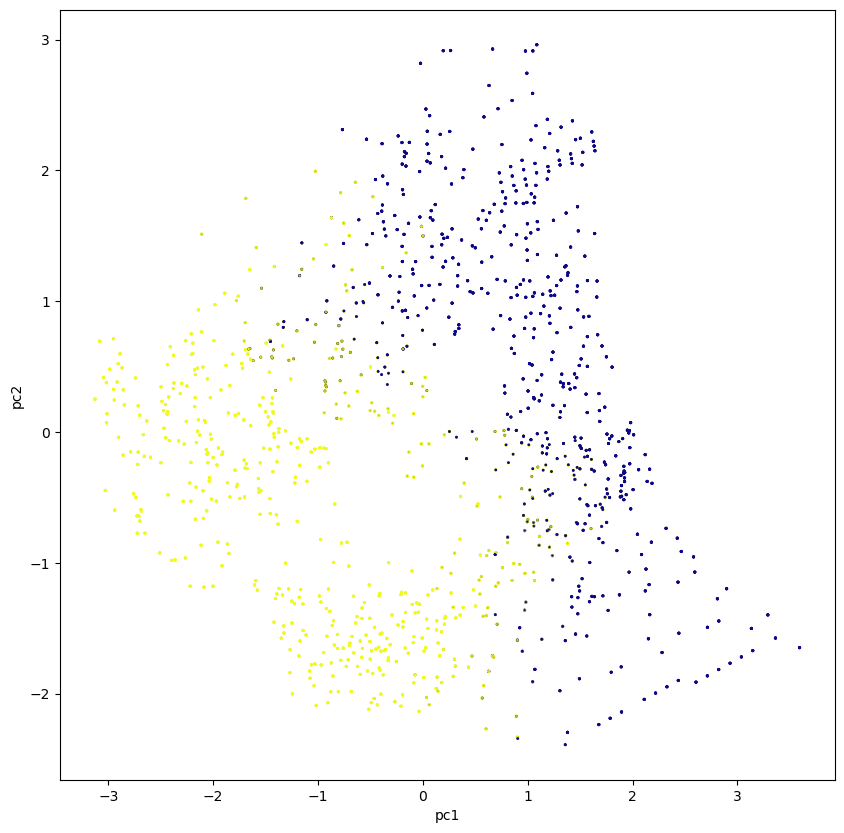

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],data[:,2],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

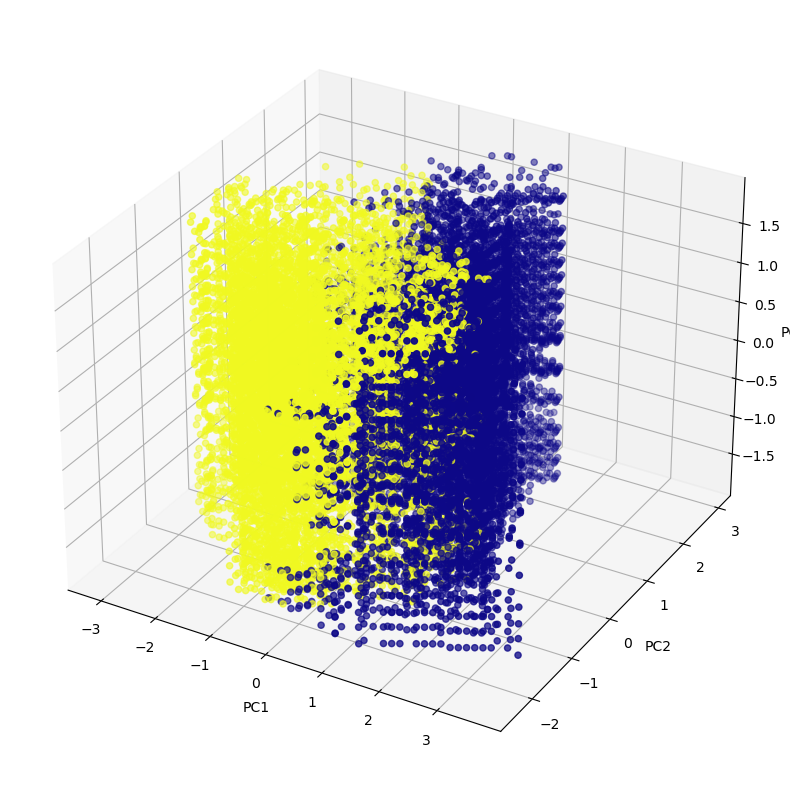

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(data[:,0],data[:,1],data[:,2], c=y,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)